In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import folium
from folium.plugins import MarkerCluster
from tqdm import tqdm # 연산과정 진행시간 체크
from wordcloud import WordCloud

In [2]:
# windows 용 한글 폰트 오류 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [3]:
raw_total = pd.read_excel("./data/crawling_raw.xlsx")
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [4]:
raw_total.dtypes

content    object
date       object
like       object
place      object
tags       object
dtype: object

In [5]:
raw_total.isna().sum()

content       0
date          0
like          0
place      5848
tags          0
dtype: int64

In [6]:
eval(raw_total["tags"][0])

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [7]:
# 해시태그 통합 저장
tags_total = []

for tag in raw_total["tags"]:
    # str 을 리스트로 변환
    tag = eval(tag)
    tags_total.extend(tag)

In [8]:
len(tags_total)

148909

# 해시태그 출현 빈도

In [9]:
#tags_total

In [10]:
# 그룹 내 원소의 종류별 빈도수를 집계

tag_counts = Counter(tags_total)
#tag_counts

In [11]:
# 가장 빈도수가 높은 해시태그 50개
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433)]

In [12]:
# 제주도 맛집과 관계없는 해시태그 제외
# 불용어 처리
STOPWORDS = [
    '#서귀포남자눈썹문신',
    '#제주속눈썹'
    '#선팔',
    '#일상',
    '#반영구',
    '#제주반영구',
    '#서귀포눈썹문신',
]

In [13]:
tag_total_selected = [tag for tag in tags_total if tag not in STOPWORDS ]
tag_total_selected

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [14]:
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432)]

In [15]:
# 아직도 속눈썹이 살아있다...

### 막대 차트

In [16]:
# 시각화용 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))

In [17]:
tag_counts_df.columns = ["tags", "counts"]

In [18]:
tag_counts_df.head()

,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주도,2096


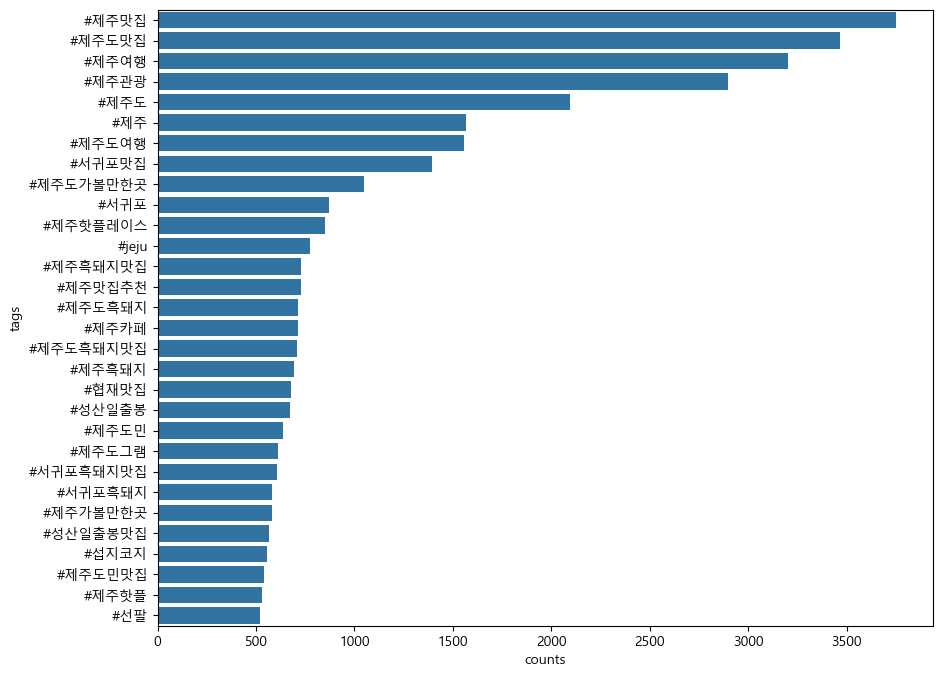

In [19]:
plt.figure(figsize = (10, 8))

sns.barplot(
    x = "counts",
    y = "tags",
    data = tag_counts_df
)
plt.show()

### 워드클라우드

In [20]:
# 한계점 : 약빨이 빨리 떨어진다 -> 돈이 잘 안벌린다...

In [21]:
# nlp 개발자... chat GPT

In [22]:
wordcloud = WordCloud(
    font_path = font_path,
    background_color = "white", # 흰색 배경색
    max_words = 100, # 최대 몇 개의 단어를 나타낼 것인지 설정
    # 우드 클라우드 내 글자들의 상대적인 크기(0 ~ 1) 
    # 0 ~ : 순위, ~ 1 : 빈도수
    relative_scaling = 0.3,
    width = 800,
    height = 400
).generate_from_frequencies(tag_counts_selected)

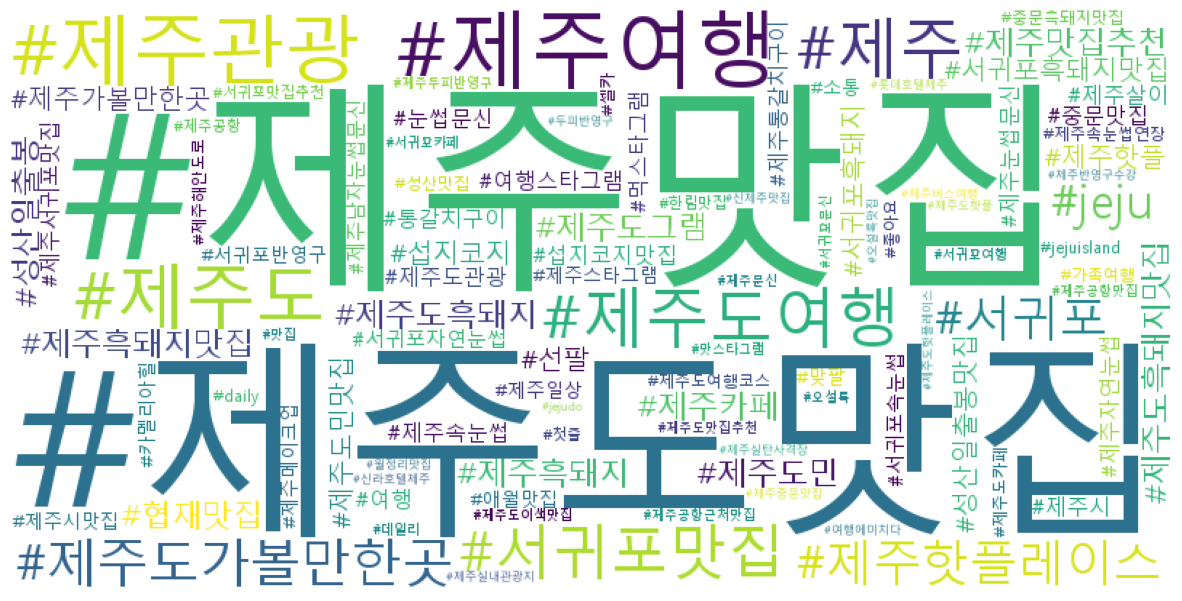

In [23]:
plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.axis("off")

plt.savefig("tag-wordcloud.png")
plt.show()

# 지도시각화할것임 (place 컬럼의 빈도수로 지도에 표기하는것)


In [24]:
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [25]:
# 장소 라는것을 명확하게 알아야함! place 컬럼을 중점적으로 볼것임!

### 위치정보 정리

In [26]:
location_counts= raw_total["place"].value_counts()
location_counts

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
사락                        1
타시텔레                      1
오운커피                      1
이중섭 미술관                   1
대구국제공항                    1
Name: count, Length: 1028, dtype: int64

In [27]:
location_counts_df = pd.DataFrame(location_counts)

In [28]:
location_counts_df.head()

,count
place,
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


## 카카오 api 로 위경도 받아오기

In [29]:
# 카카오 api 를 사용함 
r_key = "7b41b161bed6454f3ff765f8901d1576"

In [30]:
# 요청할주소
url ="https://dapi.kakao.com/v2/local/search/keyword.json"

# 헤더 설정
headers = {
    "Authorization" : f"KakaoAK {r_key}"
}
# 필수값보내기
params = {
    "query" : "코리아it신촌점"
}

In [31]:
# 요청하기
# 카카오맵 사용설정 on 해줘야함
places = requests.get(url, headers = headers, params=params )
objects = places.json()

In [32]:
arr_len = len(objects["documents"]) # 15개의 정보뜸

In [33]:
objects["documents"]

[{'address_name': '서울 마포구 노고산동 106-89',
  'category_group_code': 'AC5',
  'category_group_name': '학원',
  'category_name': '교육,학문 > 학원 > 컴퓨터학원',
  'distance': '',
  'id': '112974234',
  'phone': '02-313-7300',
  'place_name': '코리아IT아카데미학원 신촌점',
  'place_url': 'http://place.map.kakao.com/112974234',
  'road_address_name': '서울 마포구 서강로 136',
  'x': '126.93578664586859',
  'y': '37.554041546037986'}]

In [34]:
for i in objects["documents"]:
    print("장소명" , i["place_name"]) # 장소명
    print("위도" , i["x"]) # 위도
    print("경도" ,i["y"]) # 경도

장소명 코리아IT아카데미학원 신촌점
위도 126.93578664586859
경도 37.554041546037986


In [35]:
# 함수화 하기

def find_place(searching):
    r_key = "7b41b161bed6454f3ff765f8901d1576"
    # 요청할주소
    url ="https://dapi.kakao.com/v2/local/search/keyword.json"
    # 헤더 설정
    headers = {
        "Authorization" : f"KakaoAK {r_key}"
    }
    # 필수값보내기
    params = {
        "query" : searching
    }

    res = requests.get(url, headers = headers, params=params )

    # 필요한 정보 추출
    place = res.json()["documents"][0]

    name = place["place_name"]
    x = place["x"]
    y = place["y"]

    return [name, x, y , searching]
    

In [36]:
find_place("김밥천국")

['김밥천국', '126.9319836535', '37.4847369692011', '김밥천국']

#### 인스타그램 위치 좌표 수집

In [37]:
location_inform = []

for location in tqdm(location_counts_df.index):
    try :
        data = find_place(location)
        location_inform.append(data)
        time.sleep(0.1)

    except IndexError as e:
        print(location)

  0%|▎                                                                                | 4/1028 [00:00<02:17,  7.45it/s]

Jungle Book by Alice


  1%|▌                                                                                | 7/1028 [00:00<02:04,  8.22it/s]

할로비치


  1%|▊                                                                               | 10/1028 [00:01<01:41, 10.07it/s]

성산일출봉 城山日出峰  Seongsan Ilchulbong
폼포코식당_pompokokitchen


  1%|▉                                                                               | 12/1028 [00:01<01:42,  9.90it/s]

Nimome


  2%|█▋                                                                              | 22/1028 [00:02<01:53,  8.85it/s]

밥깡패
제주고궁한복카페 jeju gogung hanbok studio
제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地


  3%|██▎                                                                             | 30/1028 [00:03<02:12,  7.55it/s]

김녕미로공원 Jeju Kimnyoung Maze Park


  3%|██▍                                                                             | 32/1028 [00:04<01:42,  9.72it/s]

고래배꼽
제주 성산 신산포구자연산횟집 회포장


  4%|███                                                                             | 40/1028 [00:05<02:06,  7.83it/s]

위미2리 동백군락지


  5%|███▉                                                                            | 50/1028 [00:06<02:14,  7.29it/s]

Jeju Island 제주특별자치도 济州道


  5%|████▎                                                                           | 55/1028 [00:07<02:13,  7.31it/s]

한라산 (漢拏山, Hallasan)


  6%|████▋                                                                           | 60/1028 [00:08<02:02,  7.89it/s]

월정리카페콧수염


  6%|████▉                                                                           | 64/1028 [00:08<01:58,  8.15it/s]

牛岛 Udo Island 우도


  7%|█████▏                                                                          | 67/1028 [00:08<01:53,  8.47it/s]

제주 꿈꾸는고래 스쿠버&게스트하우스


  7%|█████▉                                                                          | 76/1028 [00:10<02:05,  7.61it/s]

고집돌우럭-gozipfish


  9%|███████▎                                                                        | 94/1028 [00:12<01:40,  9.26it/s]

Casa Linda Guesthouse-까사 린다 펜션
새별오름 (Saebyul Orum)
함덕487
Sunnyside Beachclub Jeju


 10%|███████▋                                                                        | 99/1028 [00:13<01:17, 11.93it/s]

Busan, South Korea
탐라반상
몽상드 애월 (Mônsant)


 10%|███████▉                                                                       | 103/1028 [00:13<01:27, 10.52it/s]

해발1950m 한라산 백록담


 11%|████████▋                                                                      | 113/1028 [00:15<01:59,  7.68it/s]

성산일출봉 게스트하우스 파티 띵까게스트하우스


 11%|████████▉                                                                      | 116/1028 [00:15<01:55,  7.91it/s]

커피캄머


 12%|█████████▎                                                                     | 121/1028 [00:16<01:37,  9.30it/s]

함덕반하다
Paris, France


 12%|█████████▍                                                                     | 123/1028 [00:16<01:34,  9.58it/s]

아날로그감귤체험


 12%|█████████▊                                                                     | 127/1028 [00:16<01:42,  8.78it/s]

Guzasien -구좌지앵


 13%|██████████▏                                                                    | 132/1028 [00:17<01:52,  7.97it/s]

커피파인더coffeefinder제주시청
스윗슬로cafe


 14%|███████████▍                                                                   | 149/1028 [00:19<01:38,  8.88it/s]

Harmduck Beach in Jeju Island
Jeju horse Riding farm


 17%|█████████████                                                                  | 170/1028 [00:23<01:34,  9.05it/s]

환상의 섬 Jeju Island
하례정원


 17%|█████████████▌                                                                 | 176/1028 [00:23<01:46,  7.97it/s]

한동올레펜션


 19%|██████████████▉                                                                | 195/1028 [00:26<01:46,  7.81it/s]

Ecoland Theme Park Forest Train黃花小火車


 19%|███████████████▏                                                               | 198/1028 [00:27<01:43,  8.05it/s]

Daegu, South Korea
Namwon Seogwipo Jeju,South korea


 20%|███████████████▌                                                               | 203/1028 [00:27<01:37,  8.48it/s]

빨간머리몽게스트하우스
어조횟집


 20%|███████████████▉                                                               | 208/1028 [00:28<01:23,  9.79it/s]

동굴카페 다희연(Cafe Daheeyeon in the Cave)
Jeju_Gimnyeong_Maze_Park


 21%|████████████████▎                                                              | 213/1028 [00:28<01:41,  8.05it/s]

애월해안가


 21%|████████████████▌                                                              | 216/1028 [00:29<01:22,  9.83it/s]

Hamdoek Beach, Jeju Island
済州島 - チェジュ島


 22%|█████████████████▎                                                             | 225/1028 [00:30<01:49,  7.36it/s]

제주 조류공원 화조원


 23%|██████████████████                                                             | 235/1028 [00:32<01:47,  7.40it/s]

보엠 - Bohème
평대우유차


 23%|██████████████████▍                                                            | 240/1028 [00:32<01:34,  8.37it/s]

핏제리아마노


 24%|██████████████████▊                                                            | 244/1028 [00:33<01:42,  7.67it/s]

제주 서귀포 그릴 데미그라스


 25%|███████████████████▋                                                           | 256/1028 [00:34<01:27,  8.78it/s]

다다의작은공간
붉은못허브팜 Cafe Redpond 애월본점
천왕사 (天王寺)


 25%|███████████████████▉                                                           | 260/1028 [00:35<01:11, 10.71it/s]

광안리 해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea
블리스찬


 26%|████████████████████▎                                                          | 264/1028 [00:35<01:27,  8.76it/s]

CAFE E.P.L


 26%|████████████████████▌                                                          | 268/1028 [00:36<01:34,  8.02it/s]

제주도 전주횟집


 26%|████████████████████▋                                                          | 270/1028 [00:36<01:31,  8.30it/s]

쌀다방


 27%|████████████████████▉                                                          | 273/1028 [00:36<01:32,  8.20it/s]

제스토리, 바이제주, 제주감성소품


 28%|██████████████████████▏                                                        | 288/1028 [00:39<01:23,  8.84it/s]

쿠오모제주
뉴저지카페


 29%|██████████████████████▉                                                        | 299/1028 [00:40<01:39,  7.36it/s]

Oedolgae Jeju


 29%|███████████████████████▏                                                       | 301/1028 [00:41<01:33,  7.81it/s]

빨간모자마법사


 30%|███████████████████████▌                                                       | 306/1028 [00:41<01:37,  7.39it/s]

2월22일 브런치카페


 30%|███████████████████████▉                                                       | 311/1028 [00:42<01:38,  7.25it/s]

Meal Table Garden


 31%|████████████████████████▏                                                      | 315/1028 [00:43<01:35,  7.50it/s]

Hotel Alfonso XIII, a Luxury Collection Hotel, Seville


 31%|████████████████████████▎                                                      | 317/1028 [00:43<01:28,  8.05it/s]

앤트러사이트 제주 한림점


 31%|████████████████████████▌                                                      | 319/1028 [00:43<01:23,  8.51it/s]

외쿡식당


 32%|█████████████████████████▎                                                     | 329/1028 [00:45<01:40,  6.95it/s]

토스카나호텔


 32%|█████████████████████████▍                                                     | 331/1028 [00:45<01:33,  7.48it/s]

하얏트 리젠시 제주ㅣHyatt Regency Jeju


 32%|█████████████████████████▋                                                     | 334/1028 [00:45<01:29,  7.74it/s]

윗세오름(해발 1700M)


 33%|██████████████████████████▏                                                    | 340/1028 [00:46<01:31,  7.49it/s]

Hyatt Regency, Jeju Island


 33%|██████████████████████████▎                                                    | 342/1028 [00:46<01:26,  7.96it/s]

그러므로part.2


 34%|██████████████████████████▉                                                    | 351/1028 [00:48<01:30,  7.50it/s]

포근한우리집


 35%|███████████████████████████▎                                                   | 355/1028 [00:48<01:14,  9.05it/s]

헤이미쉬제주_제주독채펜션
비양도 해녀촌
반디앤로제이


 35%|███████████████████████████▋                                                   | 360/1028 [00:49<01:18,  8.46it/s]

인공위성 제주


 35%|███████████████████████████▉                                                   | 363/1028 [00:49<01:06, 10.06it/s]

제주초가집 곱들락
비싸이드엠,beside-M


 36%|████████████████████████████▏                                                  | 367/1028 [00:50<01:16,  8.66it/s]

호끌락80번지


 37%|█████████████████████████████▏                                                 | 380/1028 [00:52<01:31,  7.08it/s]

서촌제 (서울촌놈인제주)


 38%|██████████████████████████████                                                 | 392/1028 [00:54<01:29,  7.14it/s]

접대 - 저번에 우리가 만났던 그때


 38%|██████████████████████████████▎                                                | 395/1028 [00:54<01:23,  7.57it/s]

미풍해장국  중앙점


 39%|██████████████████████████████▉                                                | 402/1028 [00:55<01:25,  7.32it/s]

That's very


 40%|███████████████████████████████▉                                               | 416/1028 [00:57<01:13,  8.35it/s]

Gagamel
몽구네민박


 41%|████████████████████████████████▏                                              | 419/1028 [00:57<01:13,  8.34it/s]

유채꽃사진촬영소


 41%|████████████████████████████████▌                                              | 424/1028 [00:58<01:16,  7.87it/s]

유리의성과마법의숲
알뜨르프로젝트2018


 42%|████████████████████████████████▉                                              | 428/1028 [00:59<01:09,  8.61it/s]

제주아트리움"비밀의그림자"공연


 42%|█████████████████████████████████▎                                             | 433/1028 [00:59<01:01,  9.63it/s]

Saturdayisland
한림공원 Hallimpark


 42%|█████████████████████████████████▍                                             | 435/1028 [00:59<01:00,  9.82it/s]

핸드테일러 제주점
Dammann Frères_다만프레르_제주신화점


 43%|█████████████████████████████████▉                                             | 441/1028 [01:00<01:08,  8.55it/s]

Ocean Suite Jeju Hotel (오션스위츠제주호텔)


 44%|██████████████████████████████████▊                                            | 453/1028 [01:02<00:55, 10.43it/s]

키아스마
쉬림포크shrimpork
라올레( La Olle)


 44%|███████████████████████████████████                                            | 457/1028 [01:02<01:03,  8.93it/s]

카페 하도섬


 45%|███████████████████████████████████▋                                           | 464/1028 [01:03<01:09,  8.12it/s]

카페록록 Loklok


 46%|███████████████████████████████████▉                                           | 468/1028 [01:04<00:57,  9.77it/s]

협제 혜변
Jungle book by Alice


 46%|████████████████████████████████████▋                                          | 477/1028 [01:05<01:13,  7.46it/s]

Suweolbong Trekking


 47%|████████████████████████████████████▉                                          | 481/1028 [01:05<00:58,  9.42it/s]

목포고을. 제주도 흑돼지 끝나는 맛!
Villadeato-빌라드아토
알동네국수


 47%|█████████████████████████████████████▎                                         | 485/1028 [01:06<00:46, 11.58it/s]

제주도 올레길 6코스 이중섭거리
동복해녀촌
치저스 제주


 48%|█████████████████████████████████████▌                                         | 489/1028 [01:06<00:53, 10.15it/s]

우리집아점


 48%|█████████████████████████████████████▋                                         | 491/1028 [01:06<00:56,  9.56it/s]

김녕함바그집


 49%|██████████████████████████████████████▍                                        | 500/1028 [01:08<00:59,  8.81it/s]

모닝딜라이트제주광양점
하이클래스 제주 (Hiclass Jeju)


 49%|██████████████████████████████████████▉                                        | 506/1028 [01:08<01:06,  7.81it/s]

새별오름 정상


 50%|███████████████████████████████████████▏                                       | 510/1028 [01:09<01:05,  7.87it/s]

미나마라


 50%|███████████████████████████████████████▎                                       | 512/1028 [01:09<01:01,  8.42it/s]

기쁨이네 감자탕


 50%|███████████████████████████████████████▋                                       | 517/1028 [01:10<01:05,  7.76it/s]

웃뜨르 우리돼지


 51%|████████████████████████████████████████▏                                      | 523/1028 [01:11<01:06,  7.57it/s]

카페2472


 52%|████████████████████████████████████████▋                                      | 530/1028 [01:12<01:08,  7.32it/s]

릴리펏 제주점 메종글래드호텔


 52%|█████████████████████████████████████████▎                                     | 537/1028 [01:13<01:06,  7.39it/s]

오마주마카롱


 54%|██████████████████████████████████████████▍                                    | 553/1028 [01:15<01:06,  7.14it/s]

Jeju Island, South Korea - 제주도


 54%|██████████████████████████████████████████▋                                    | 555/1028 [01:15<00:49,  9.48it/s]

에코랜드 라벤다앤그린티로즈가든역
Sensō-ji


 55%|███████████████████████████████████████████                                    | 561/1028 [01:16<00:50,  9.23it/s]

날씬흑돼지
CAMPHORTREE Hotel & Resort
홍대 깐풍기브라더스


 56%|████████████████████████████████████████████                                   | 574/1028 [01:18<01:04,  7.01it/s]

Thecoffeebrew-더커피브루


 56%|████████████████████████████████████████████▎                                  | 577/1028 [01:19<00:59,  7.63it/s]

블랙하우스 떡볶이레스토랑


 57%|████████████████████████████████████████████▋                                  | 581/1028 [01:19<00:58,  7.60it/s]

정방폭포가 보이는 암벽위


 57%|████████████████████████████████████████████▉                                  | 585/1028 [01:20<00:56,  7.91it/s]

Shmonga


 57%|█████████████████████████████████████████████▏                                 | 588/1028 [01:20<00:45,  9.78it/s]

Hibi & Kohaku
神의 한모(신의 한모)


 57%|█████████████████████████████████████████████▎                                 | 590/1028 [01:20<00:45,  9.61it/s]

마가리따 은혜씨cafe&Dining pub


 58%|█████████████████████████████████████████████▊                                 | 596/1028 [01:21<00:55,  7.84it/s]

Jaju,south Korea


 58%|█████████████████████████████████████████████▉                                 | 598/1028 [01:21<00:44,  9.71it/s]

청초수물회&섭국 [신관]
동탄2에 산다


 59%|██████████████████████████████████████████████▋                                | 608/1028 [01:23<00:56,  7.41it/s]

모던플레이스 리조트


 60%|███████████████████████████████████████████████                                | 612/1028 [01:23<00:54,  7.66it/s]

Shimo-kitazawa Station


 60%|███████████████████████████████████████████████▏                               | 614/1028 [01:23<00:43,  9.42it/s]

브라운스위트 제주
Shineville Luxury Resort


 60%|███████████████████████████████████████████████▋                               | 620/1028 [01:24<00:52,  7.78it/s]

Novotel Ambassador Daegu


 61%|███████████████████████████████████████████████▉                               | 623/1028 [01:25<00:50,  8.01it/s]

새우조나단


 61%|████████████████████████████████████████████████                               | 626/1028 [01:25<00:49,  8.14it/s]

내츄럴케이
오라게게스트하우스


 62%|████████████████████████████████████████████████▋                              | 634/1028 [01:26<00:51,  7.61it/s]

Sangumburi Crater


 62%|█████████████████████████████████████████████████▏                             | 640/1028 [01:27<00:43,  8.84it/s]

Yacht Tour Shangri-La
초콜릿랜드 / Chocolate Land


 63%|█████████████████████████████████████████████████▍                             | 644/1028 [01:27<00:40,  9.55it/s]

키작은삼촌
엉장매하우스


 63%|██████████████████████████████████████████████████                             | 651/1028 [01:28<00:51,  7.32it/s]

랍스터빈_jeju


 64%|██████████████████████████████████████████████████▎                            | 655/1028 [01:29<00:48,  7.77it/s]

Jerry's PUB


 64%|██████████████████████████████████████████████████▊                            | 662/1028 [01:30<00:47,  7.66it/s]

Halim jeju korea Selatan


 65%|███████████████████████████████████████████████████▎                           | 668/1028 [01:31<00:48,  7.45it/s]

제주국제공항 활주로 (Jeju Airport Runway)


 65%|███████████████████████████████████████████████████▌                           | 671/1028 [01:31<00:45,  7.87it/s]

제주신화월드 메리어트 리조트관


 65%|███████████████████████████████████████████████████▋                           | 673/1028 [01:31<00:42,  8.44it/s]

8월의크리스마스 초원사진관


 66%|████████████████████████████████████████████████████                           | 677/1028 [01:32<00:35,  9.95it/s]

블루밍아일랜드 Blooming Island
동광 pâtisserie '東光'


 66%|████████████████████████████████████████████████████▏                          | 679/1028 [01:32<00:35,  9.76it/s]

베이크샵스니프 bakeshop sniff
팀버 커피 제주


 67%|████████████████████████████████████████████████████▋                          | 685/1028 [01:33<00:41,  8.25it/s]

장복호


 67%|████████████████████████████████████████████████████▊                          | 687/1028 [01:33<00:39,  8.56it/s]

모메든식당


 67%|████████████████████████████████████████████████████▉                          | 689/1028 [01:33<00:38,  8.91it/s]

Gwakji Beaches


 67%|█████████████████████████████████████████████████████▏                         | 692/1028 [01:33<00:37,  8.92it/s]

제주마라도잠수함


 68%|█████████████████████████████████████████████████████▍                         | 696/1028 [01:34<00:41,  8.02it/s]

비자림 (Bija Forest, 榧子林)


 68%|█████████████████████████████████████████████████████▋                         | 698/1028 [01:34<00:39,  8.40it/s]

우도 (Udo / 牛島)


 68%|█████████████████████████████████████████████████████▊                         | 700/1028 [01:34<00:38,  8.59it/s]

제주도가는 비행기 안


 68%|██████████████████████████████████████████████████████                         | 703/1028 [01:35<00:31, 10.20it/s]

한모살식당
로드129


 69%|██████████████████████████████████████████████████████▏                        | 705/1028 [01:35<00:32,  9.92it/s]

U-do Bong( 우도봉)
오메오메동문시장점


 69%|██████████████████████████████████████████████████████▍                        | 709/1028 [01:35<00:33,  9.57it/s]

Málaga, Spain


 70%|██████████████████████████████████████████████████████▉                        | 715/1028 [01:36<00:39,  7.98it/s]

Marevo Resort / 마레보 리조트
Coco Mama


 70%|███████████████████████████████████████████████████████▍                       | 721/1028 [01:37<00:31,  9.60it/s]

미미본가
풍미독서
털보네고양이


 71%|███████████████████████████████████████████████████████▋                       | 725/1028 [01:37<00:26, 11.34it/s]

쿠쿠아림
리틀이태리 비스트로


 71%|████████████████████████████████████████████████████████▏                      | 731/1028 [01:38<00:30,  9.59it/s]

드렁큰디제이
Cafe멘도롱


 71%|████████████████████████████████████████████████████████▎                      | 733/1028 [01:38<00:30,  9.66it/s]

못생김
제주한면가 濟州韓麵家


 72%|████████████████████████████████████████████████████████▊                      | 739/1028 [01:39<00:29,  9.69it/s]

군산 정상
하노이안브라더스


 73%|█████████████████████████████████████████████████████████▎                     | 746/1028 [01:40<00:31,  9.01it/s]

포팩토리
Mansion37.5


 73%|█████████████████████████████████████████████████████████▌                     | 749/1028 [01:40<00:32,  8.62it/s]

어반가라지


 73%|█████████████████████████████████████████████████████████▋                     | 751/1028 [01:40<00:31,  8.88it/s]

바람코지 게스트하우스&카페
어라운드 폴리 Around Follie


 73%|█████████████████████████████████████████████████████████▉                     | 754/1028 [01:40<00:23, 11.80it/s]

바굥식당
가드망제
섶섬해녀할망카페


 74%|██████████████████████████████████████████████████████████▍                    | 760/1028 [01:41<00:29,  9.14it/s]

서양차관
요요무문


 75%|██████████████████████████████████████████████████████████▊                    | 766/1028 [01:42<00:30,  8.54it/s]

돈테일러익스프레


 75%|███████████████████████████████████████████████████████████▎                   | 771/1028 [01:43<00:31,  8.21it/s]

월정곰닭


 75%|███████████████████████████████████████████████████████████▍                   | 774/1028 [01:43<00:29,  8.67it/s]

숨비아일랜드


 76%|███████████████████████████████████████████████████████████▊                   | 778/1028 [01:43<00:25,  9.76it/s]

Uncommon Table
라비에 와인비스트로


 76%|████████████████████████████████████████████████████████████                   | 781/1028 [01:44<00:26,  9.44it/s]

제주시 조천읍 와선로 206
제주인의밥상


 77%|████████████████████████████████████████████████████████████▉                  | 793/1028 [01:45<00:31,  7.51it/s]

타쿠마 - Takuma
Salon De 소자38


 78%|█████████████████████████████████████████████████████████████▎                 | 798/1028 [01:46<00:27,  8.51it/s]

빌라드아토


 78%|█████████████████████████████████████████████████████████████▌                 | 801/1028 [01:46<00:27,  8.25it/s]

카페모리&베이커스트리트


 79%|██████████████████████████████████████████████████████████████                 | 808/1028 [01:47<00:27,  7.89it/s]

Segovia, Spain


 79%|██████████████████████████████████████████████████████████████▎                | 811/1028 [01:48<00:25,  8.41it/s]

큰엉전망대쉼터


 79%|██████████████████████████████████████████████████████████████▌                | 814/1028 [01:48<00:25,  8.36it/s]

오샹띠


 79%|██████████████████████████████████████████████████████████████▊                | 817/1028 [01:48<00:25,  8.32it/s]

빌리엔젤 제주노형점


 80%|███████████████████████████████████████████████████████████████                | 821/1028 [01:49<00:24,  8.38it/s]

702키친


 80%|███████████████████████████████████████████████████████████████▎               | 824/1028 [01:49<00:24,  8.46it/s]

더아트스테이호텔-The Artstay Hotel


 81%|███████████████████████████████████████████████████████████████▊               | 830/1028 [01:50<00:25,  7.82it/s]

Bronx, New York


 81%|████████████████████████████████████████████████████████████████               | 834/1028 [01:50<00:19,  9.84it/s]

스테이굿무드
내콩가


 82%|█████████████████████████████████████████████████████████████████▏             | 848/1028 [01:53<00:24,  7.25it/s]

Kairos jeju


 83%|█████████████████████████████████████████████████████████████████▍             | 852/1028 [01:53<00:22,  7.74it/s]

시루애월카페
까망고띠


 83%|█████████████████████████████████████████████████████████████████▊             | 856/1028 [01:54<00:19,  8.87it/s]

사우스바운더 Southbounder Brewery


 84%|██████████████████████████████████████████████████████████████████▏            | 861/1028 [01:54<00:20,  8.23it/s]

BUTTON STAY 단추스테이 게스트하우스


 84%|██████████████████████████████████████████████████████████████████▍            | 864/1028 [01:55<00:20,  8.02it/s]

Howard Johnson Jeju Yeondong Hotel - 하워드존슨 제주 연동 호텔


 85%|██████████████████████████████████████████████████████████████████▊            | 870/1028 [01:55<00:18,  8.53it/s]

ECOLAND theme park
함덕 Fishya


 85%|███████████████████████████████████████████████████████████████████▎           | 876/1028 [01:56<00:19,  7.72it/s]

제주 반디앤로제이 펜션 & 플라워브런치카페


 86%|███████████████████████████████████████████████████████████████████▊           | 882/1028 [01:57<00:18,  7.75it/s]

Cafe delmundo


 86%|████████████████████████████████████████████████████████████████████▏          | 887/1028 [01:58<00:17,  7.88it/s]

한라산 정상 해발 1,950m


 87%|████████████████████████████████████████████████████████████████████▌          | 892/1028 [01:58<00:17,  7.93it/s]

건축카페 - 섶섬이보이는


 87%|████████████████████████████████████████████████████████████████████▊          | 895/1028 [01:59<00:16,  8.27it/s]

평화통일불사리탑사


 87%|█████████████████████████████████████████████████████████████████████          | 898/1028 [01:59<00:15,  8.46it/s]

원더먼트제주


 88%|█████████████████████████████████████████████████████████████████████▎         | 902/1028 [02:00<00:12, 10.02it/s]

산방굴사 (Sanbanggulsa Temple 山房窟寺)
바램목장&카페


 88%|█████████████████████████████████████████████████████████████████████▍         | 904/1028 [02:00<00:12,  9.99it/s]

La Tortuga


 88%|█████████████████████████████████████████████████████████████████████▊         | 908/1028 [02:00<00:12,  9.98it/s]

카페어떤오후
Gimpo International Airport - 金浦国际机场 - 김포공항


 89%|██████████████████████████████████████████████████████████████████████         | 912/1028 [02:01<00:12,  9.05it/s]

블루라군다이브-bluelagoondive


 89%|██████████████████████████████████████████████████████████████████████▎        | 915/1028 [02:01<00:13,  8.45it/s]

제주도 하늘 위
목수금토일


 90%|██████████████████████████████████████████████████████████████████████▊        | 922/1028 [02:02<00:11,  9.59it/s]

피규어 뮤지엄 제주  Figure Museum Jeju
Arc de Triomphe


 90%|███████████████████████████████████████████████████████████████████████▏       | 927/1028 [02:02<00:10,  9.53it/s]

덕인당 소락
자구리 카페 몬들락 Cafe Mondeulrak


 91%|███████████████████████████████████████████████████████████████████████▊       | 934/1028 [02:03<00:10,  8.99it/s]

블루마린하우스
해물뚝배기전문 재암식당


 91%|███████████████████████████████████████████████████████████████████████▉       | 936/1028 [02:04<00:09,  9.44it/s]

Ramada Plaza Jeju


 92%|████████████████████████████████████████████████████████████████████████▎      | 941/1028 [02:04<00:10,  8.03it/s]

성산일출봉 코앞 쉼터


 92%|████████████████████████████████████████████████████████████████████████▍      | 943/1028 [02:05<00:09,  8.60it/s]

마담제 게스트하우스


 92%|█████████████████████████████████████████████████████████████████████████      | 950/1028 [02:05<00:09,  8.00it/s]

Maxim 모카다방


 93%|█████████████████████████████████████████████████████████████████████████▍     | 955/1028 [02:06<00:06, 11.24it/s]

폴레폴레게스트하우스 -Polepole Guesthouse in Jeju
十五夜 siboya 십오야
Oslob, Cebu
중문 마린파크 퍼시픽랜드


 93%|█████████████████████████████████████████████████████████████████████████▋     | 959/1028 [02:06<00:06, 10.39it/s]

개똥이네 동물원


 94%|██████████████████████████████████████████████████████████████████████████     | 963/1028 [02:07<00:05, 11.83it/s]

테라로사-이사랑
Saeyeon Bridge, Jeju Island
협재술시


 94%|██████████████████████████████████████████████████████████████████████████▎    | 967/1028 [02:07<00:06,  9.52it/s]

투썸플레이스 제주애월한담점


 94%|██████████████████████████████████████████████████████████████████████████▍    | 969/1028 [02:07<00:06,  9.53it/s]

한복입는 선흘집


 95%|██████████████████████████████████████████████████████████████████████████▊    | 973/1028 [02:08<00:06,  8.65it/s]

제주워터월드/감귤노천탕


 95%|███████████████████████████████████████████████████████████████████████████▍   | 981/1028 [02:09<00:05,  7.87it/s]

Volskafé


 96%|███████████████████████████████████████████████████████████████████████████▊   | 987/1028 [02:10<00:05,  7.57it/s]

한화아쿠아넷


 96%|████████████████████████████████████████████████████████████████████████████▏  | 991/1028 [02:10<00:04,  7.63it/s]

저녁정원


 97%|████████████████████████████████████████████████████████████████████████████▍  | 994/1028 [02:11<00:04,  7.91it/s]

Soror


 97%|████████████████████████████████████████████████████████████████████████████▌  | 997/1028 [02:11<00:03,  7.89it/s]

유민 아르누보 콜렉션


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1000/1028 [02:12<00:03,  8.16it/s]

카페하도섬/엠스테이펜션


 98%|████████████████████████████████████████████████████████████████████████████  | 1003/1028 [02:12<00:03,  8.33it/s]

중문관광단지 (Jungmun Tourism Complex)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1010/1028 [02:13<00:01,  9.48it/s]

머스태쉬커피/머스태쉬하우스
네이처캔바스


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1012/1028 [02:13<00:01,  9.32it/s]

제주인에이에이


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1020/1028 [02:14<00:01,  7.52it/s]

돌담너머바다


100%|█████████████████████████████████████████████████████████████████████████████▊| 1026/1028 [02:15<00:00,  7.74it/s]

타시텔레


100%|██████████████████████████████████████████████████████████████████████████████| 1028/1028 [02:15<00:00,  7.57it/s]


In [41]:
len(location_inform)

754

In [42]:
# 위치 정보 저장 (데이터프레임으로저장~~!!!~~~!!!)

location_inform_df = pd.DataFrame(location_inform)
location_inform_df.columns = ["카카오지도위치명", "경도", "위도", "인스타위치명"]
location_inform_df.head()

,카카오지도위치명,경도,위도,인스타위치명
0,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Jeju
1,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Jeju-do
2,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Seogwipo
3,바이나흐튼 크리스마스박물관,126.32779866033343,33.29131209935493,제주도 크리스마스 박물관
4,서귀포 제주에인감귤밭 카페,126.539032146678,33.2565652662429,제주에인감귤밭


### 이제 이 정보로 지도를 그려보자

In [43]:
# 지도는?? Folium

seoul_map = folium.Map(
    location = [37.55, 126.98], # 위도,경도
    zoom_start = 12, # 처음 지도 만들때 시작할 위치 크면클수록 줌인됨
)



In [44]:
seoul_map

In [45]:
location_counts_df.head()
# 이거랑 병합해버릴꺼임 count 컬럼으로 가중치를 계산하기 위해서!!!!!!!!!!!

,count
place,
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [46]:
# location_counts_df 에서는 인덱스 기준으로 병합
location_data = pd.merge(
    location_inform_df,
    location_counts_df,
    left_on = "인스타위치명",
    right_index = True,
    
)

location_data.head()

,카카오지도위치명,경도,위도,인스타위치명,count
0,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Jeju,271
1,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Jeju-do,179
2,올레길 7코스(서귀포-월평 올레),126.54685036186247,33.244247088965814,Seogwipo,66
3,바이나흐튼 크리스마스박물관,126.32779866033343,33.29131209935493,제주도 크리스마스 박물관,59
4,서귀포 제주에인감귤밭 카페,126.539032146678,33.2565652662429,제주에인감귤밭,48


In [50]:
location_data.to_csv("./data/insta_data_final.csv", index = False)

In [51]:
pd.read_csv("./data/insta_data_final.csv")

,카카오지도위치명,경도,위도,인스타위치명,count
0,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Jeju,271
1,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Jeju-do,179
2,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Seogwipo,66
3,바이나흐튼 크리스마스박물관,126.327799,33.291312,제주도 크리스마스 박물관,59
4,서귀포 제주에인감귤밭 카페,126.539032,33.256565,제주에인감귤밭,48
...,...,...,...,...,...
749,스모크하우스인구억,126.278376,33.270783,스모크하우스인구억,1
750,사락,128.400863,35.264007,사락,1
751,원앤오운,126.920450,37.549066,오운커피,1
752,이중섭미술관 (휴관중),126.564873,33.245860,이중섭 미술관,1


In [96]:
location_data =pd.read_csv("./data/insta_data_final.csv")

In [97]:
location_data.head()

,카카오지도위치명,경도,위도,인스타위치명,count
0,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Jeju,271
1,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Jeju-do,179
2,올레길 7코스(서귀포-월평 올레),126.546850,33.244247,Seogwipo,66
3,바이나흐튼 크리스마스박물관,126.327799,33.291312,제주도 크리스마스 박물관,59
4,서귀포 제주에인감귤밭 카페,126.539032,33.256565,제주에인감귤밭,48


In [74]:
location_data["카카오지도위치명"].value_counts()

카카오지도위치명
올레길 7코스(서귀포-월평 올레)    6
제주동문시장                4
협재해수욕장                4
세화해변                  3
이호테우해수욕장              3
                     ..
스모크하우스인구억             1
사락                    1
원앤오운                  1
이중섭미술관 (휴관중)          1
서귀포KAL호텔              1
Name: count, Length: 681, dtype: int64

In [55]:
# 카카오지도위치명이 중복되는 row는 삭제

In [56]:
# 하나하나 따지는것 힘드니까 중복되는 것들을 합쳐버리는 선택을 함

In [57]:
# for 문보다는 따로따록 처리하는것이 더 간단할수있다
# 강의 편의상 그냥 병합하겠음

In [81]:
# 장소 이름 기준 병합 (중복 제거)
location_data = location_data.groupby(["카카오지도위치명", "경도", "위도"])[["count"]].sum()

In [82]:
location_data.head()

,,,count
카카오지도위치명,경도,위도,
1158족욕카페,126.336500,33.467078,1
73st,126.455109,33.456991,1
CU 수원광장점,127.000144,37.268120,1
CU 제주부영리조트점,126.422606,33.242335,1
KBS 본관,126.916149,37.526098,1


In [83]:
location_data.reset_index().head()

,카카오지도위치명,경도,위도,count
0,1158족욕카페,126.336500,33.467078,1
1,73st,126.455109,33.456991,1
2,CU 수원광장점,127.000144,37.268120,1
3,CU 제주부영리조트점,126.422606,33.242335,1
4,KBS 본관,126.916149,37.526098,1


In [89]:
location_data

,,,count
카카오지도위치명,경도,위도,
1158족욕카페,126.336500,33.467078,1
73st,126.455109,33.456991,1
CU 수원광장점,127.000144,37.268120,1
CU 제주부영리조트점,126.422606,33.242335,1
KBS 본관,126.916149,37.526098,1
...,...,...,...
휘슬락호텔 주차장,126.525761,33.517636,1
휴애리자연생활공원,126.635410,33.309410,11
흑돼지가있는풍경 본점,126.480646,33.475376,1


#### 지도 시각화

In [67]:
# 지도 시각화를 하기위해서 전처리를 끝냈음

In [68]:
# 써클마커

In [101]:
# folium
Mt_Hanla = [33.3625, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start =11 )
map_jeju

In [90]:
location_data

,,,count
카카오지도위치명,경도,위도,
1158족욕카페,126.336500,33.467078,1
73st,126.455109,33.456991,1
CU 수원광장점,127.000144,37.268120,1
CU 제주부영리조트점,126.422606,33.242335,1
KBS 본관,126.916149,37.526098,1
...,...,...,...
휘슬락호텔 주차장,126.525761,33.517636,1
휴애리자연생활공원,126.635410,33.309410,11
흑돼지가있는풍경 본점,126.480646,33.475376,1


In [103]:
# 
for i in range(len(location_data)):
    name = location_data["카카오지도위치명"][i] # 공식 명칭
    count = location_data["count"][i] # 게시글 개수
    size = int(count) * 2
    long = float(location_data["위도"][i])
    lat = float(location_data["경도"][i])
    folium.CircleMarker((long,lat), radius = size, color = "red", popup = name).add_to(map_jeju)

#### 그룹으로 지도 시각화

- 서클마커는 특정 지역에 너무 몰려잇을 경우 개별 위치를 확인하기 어려움
- 인접한 서클마커들끼리 그룹으로 묶어서 표현

In [92]:
location_data

,,,count
카카오지도위치명,경도,위도,
1158족욕카페,126.336500,33.467078,1
73st,126.455109,33.456991,1
CU 수원광장점,127.000144,37.268120,1
CU 제주부영리조트점,126.422606,33.242335,1
KBS 본관,126.916149,37.526098,1
...,...,...,...
휘슬락호텔 주차장,126.525761,33.517636,1
휴애리자연생활공원,126.635410,33.309410,11
흑돼지가있는풍경 본점,126.480646,33.475376,1


In [104]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data["위도"]), float(data["경도"])))
    names.append(data["카카오지도위치명"])


map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations,
    popups = names,
    name = "jeju",
    overlay = True,
    control = True
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

In [105]:
map_jeju2